# Práctica 2: Validar afirmaciones periodísticas con Python

## Nombre: Angel Jesus Martinez Briones
### Modelos estadísticos

El propósito de esta práctica es aplicar técnicas de análisis exploratorio de datos (EDA) para verificar cuantitativamente las afirmaciones presentadas en el reportaje periodístico titulado “Gun Deaths in America”, publicado por FiveThirtyEight: disponible en <https://fivethirtyeight.com/features/gun-deaths/>

Utiliza el archivo de datos `gun_deaths.csv`, el cual contiene información detallada sobre las muertes relacionadas con armas de fuego en Estados Unidos, incluyendo causas, edades, géneros y razas de las víctimas.

Las afirmaciones que tienes que validar son:


1. Distribución por tipo de muerte:

> “Los suicidios representan aproximadamente el 62.7\% (\~21,000), los homicidios el 34.9\% (\~11,500), y solo el 1.6\% (\~500) de las muertes por arma de fuego fueron accidentes.”

2. Distribución por género:

> “Más del 85\% de las muertes por suicidio corresponden a hombres. Las mujeres representan aproximadamente el 13\% de las muertes por accidentes y el 15 % de los homicidios.”

3. Edad, raza y homicidio:

> “Cerca de dos tercios de las víctimas de homicidio que son hombres entre 15 y 34 años de edad son personas negras.”

4. Promedio anual de muertes (2012–2014):

> “En promedio, alrededor de 33,000 personas murieron por arma de fuego cada año entre 2012 y 2014.”

Además, visualiza tus hallazgos con gráficos adecuados: barras, pastel, líneas, histogramas, etc.

La actividad deberá entregarse en formato PDF y deberá seguir la siguiente estructura:

-   Introducción
-   Índice
-   Validación de las afirmaciones
-   Conclusiones
-   Referencias

# Introduccion
Las muertes por armas de fuego representa uno de los problemas mas grandes que enfrenta estados unidos, según el proyecto de investigación de FiveThirtyEight, más de 33,000 personas mueren al año por disparos.

Este es un problema que afecta de manera homogenea a los estado unidenses, no hay distincion de clases sociales entre los involuclados, tampoco genero, origen etnico, edad o profesion. El articiulo web citado en este trabajo presenta un panorama general de las muertes por armas de fuego.

Este trabajo de análisis estadístico buscará validar a traves de una base de datos las afirmaciones que dicho articulo expone, tambien se realizaran digramas que ayuden a visualizar estos datos.

# Indice
* [Introducción](#introduccion)
* [Índice](#indice)
* [Métodos](#metodos)
* [Validaciones](#validaciones)
* [Conclusión](#conclusion)
* [Referencias](#referencias)

# Metodos

Para validar las afirmaciones del artículo de FiveThirtyEight sobre las muertes por armas de fuego en Estados Unidos, se llevó a cabo un análisis basado en el archivo `gun_deaths.csv`, el cual contiene registros de estos eventos.

El análisis se realizó utilizando Python 3 dentro de Jupyter Notebook ya que este entorno permite un flujo flujo de trabajo amigable con el estudiante.

Se emplearon las siguientes librerías:

__pandas__ para la carga, limpieza y manipulación de datos.  
__numpy__ para operaciones estadísticas básicas.  
__matplotlib__ y __seaborn__ para la visualización de datos. 


# Validaciones

In [186]:
#Importamos las liberias y cargamos el archvo .csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

df = pd.read_csv("gun_deaths.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  540 non-null    int64  
 1   Intent      540 non-null    object 
 2   Gender      540 non-null    object 
 3   Age         540 non-null    object 
 4   Race        540 non-null    object 
 5   Deaths      540 non-null    int64  
 6   Population  540 non-null    int64  
 7   Rate        468 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 33.9+ KB


In [187]:
df.head()

,Unnamed: 0,Intent,Gender,Age,Race,Deaths,Population,Rate
0,1,None selected,None selected,None selected,None selected,33599,316299978,10.6
1,2,None selected,None selected,None selected,White,22079,197369634,11.2
2,3,None selected,None selected,None selected,Black,7765,38896382,20.0
3,4,None selected,None selected,None selected,Hispanic,3007,54049078,5.6
4,5,None selected,None selected,None selected,Asian/Pacific Islander,442,16315561,2.7


In [188]:
#1. Distribución por tipo de muerte:

#“Los suicidios representan aproximadamente el 62.7\% (\~21,000), los homicidios el 34.9\% (\~11,500),
#y solo el 1.6\% (\~500) de las muertes por arma de fuego fueron accidentes.”
df_filter = df[df['Intent']!='None selected']

In [189]:
df_filter['Intent'].unique()

array(['Suicide', 'Homicide', 'Accident', 'Unknown'], dtype=object)

In [190]:
df_filter.groupby('Intent')['Deaths'].sum()/df_filter['Deaths'].sum()*100

Intent
Accident     1.625067
Homicide    34.900238
Suicide     62.675184
Unknown      0.799512
Name: Deaths, dtype: float64

In [191]:
df_filter.groupby('Intent')['Deaths'].sum()

Intent
Accident      4368
Homicide     93808
Suicide     168464
Unknown       2149
Name: Deaths, dtype: int64

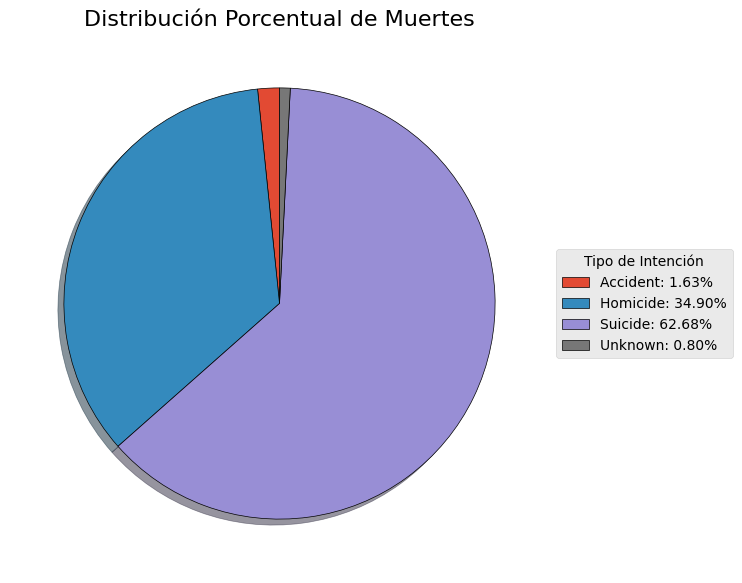

In [192]:
import seaborn as sns
intent_percent = df_filter.groupby('Intent')['Deaths'].sum() / df_filter['Deaths'].sum() * 100

etiquetas_leyenda = [f'{label}: {val:.2f}%' 
                     for label, val in zip(intent_percent.index, intent_percent.values)]

plt.figure(figsize=(9, 7)) 

wedges, texts = plt.pie(
    intent_percent.values, 
    startangle=90,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)

plt.legend(
    wedges, 
    etiquetas_leyenda, 
    title="Tipo de Intención",
    loc="center left",             
    bbox_to_anchor=(1, 0, 0.5, 1)  
)

plt.title('Distribución Porcentual de Muertes', fontsize=16)
plt.show()

In [210]:
#2. Distribución por género:

#“Más del 85\% de las muertes por suicidio corresponden a hombres. Las mujeres representan aproximadamente 
#el 13\% de las muertes por accidentes y el 15 % de los homicidios.”
df_filter2 = df[df['Gender']!='None selected']
df_suicide = df_filter2[df_filter2['Intent'] == 'Suicide']

In [211]:
df_suicide['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [212]:
df_suicide.groupby(['Gender','Intent'])['Deaths'].sum()/df_suicide['Deaths'].sum()*100

Gender  Intent 
Female  Suicide    13.755891
Male    Suicide    86.244109
Name: Deaths, dtype: float64

In [213]:
df_homicide = df_filter2[df_filter2['Intent'] == 'Homicide']

In [214]:
df_homicide.groupby(['Gender','Intent'])['Deaths'].sum()/df_homicide['Deaths'].sum()*100

Gender  Intent  
Female  Homicide    15.279495
Male    Homicide    84.720505
Name: Deaths, dtype: float64

In [244]:
df_accident = df_filter2[df_filter2['Intent'] == 'Accident']

In [245]:
df_accident.groupby(['Gender','Intent'])['Deaths'].sum()/df_accident['Deaths'].sum()*100

Gender  Intent  
Female  Accident    13.324176
Male    Accident    86.675824
Name: Deaths, dtype: float64

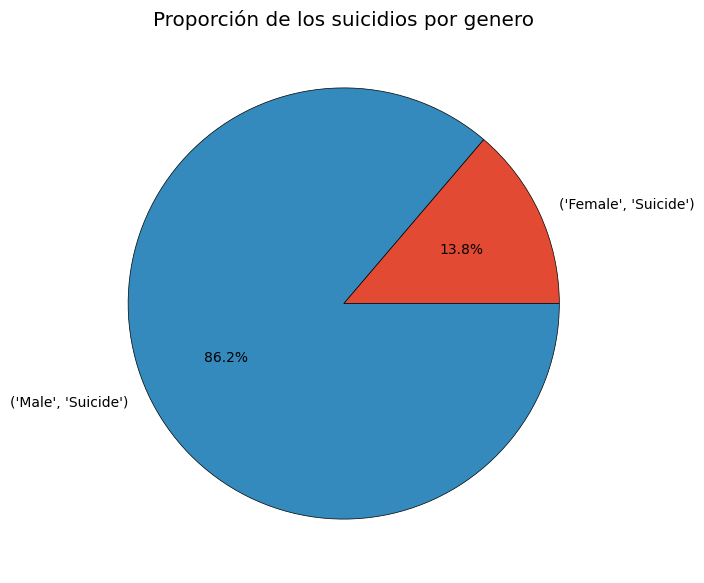

In [241]:
intent_percent2 = df_suicide.groupby(['Gender','Intent'])['Deaths'].sum()/df_suicide['Deaths'].sum()*100

plt.figure(figsize=(7,7))
plt.pie(
    intent_percent2.values, 
    labels=intent_percent2.index, 
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)
plt.title('Proporción de los suicidios por genero')
plt.show()


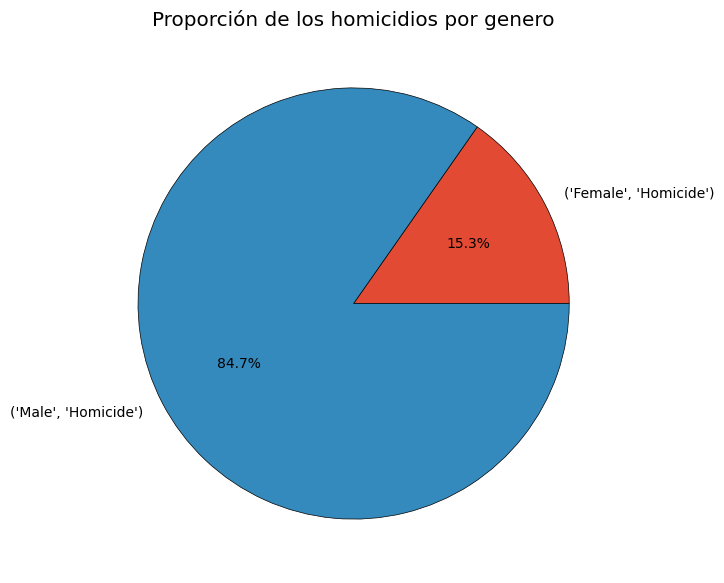

In [242]:
intent_percent3 = df_homicide.groupby(['Gender','Intent'])['Deaths'].sum()/df_homicide['Deaths'].sum()*100

plt.figure(figsize=(7,7))
plt.pie(
    intent_percent3.values, 
    labels=intent_percent3.index, 
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)
plt.title('Proporción de los homicidios por genero')
plt.show()

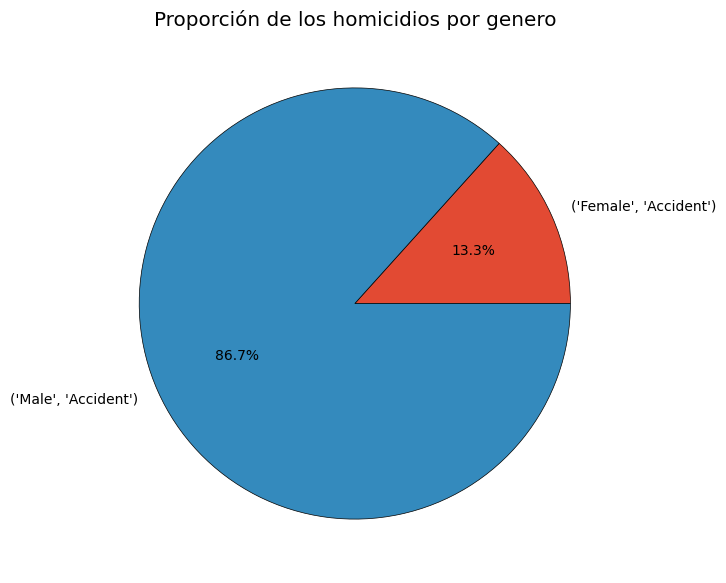

In [246]:
intent_percent4 = df_accident.groupby(['Gender','Intent'])['Deaths'].sum()/df_accident['Deaths'].sum()*100

plt.figure(figsize=(7,7))
plt.pie(
    intent_percent4.values, 
    labels=intent_percent4.index, 
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)
plt.title('Proporción de los homicidios por genero')
plt.show()

In [227]:
#3. Edad, raza y homicidio:

#“Cerca de dos tercios de las víctimas de homicidio que son hombres entre 15 y 34 años de edad son personas negras.”
df_filter_age = df[df['Age']!='None selected']
df_filter_race = df_filter_age[df_filter_age['Race']!='None selected']
df_filter_age['Age'].unique()

array(['Under 15', '15 - 34', '35 - 64', '65+', '5'], dtype=object)

In [228]:
df_filter_race['Race'].unique()

array(['White', 'Black', 'Hispanic', 'Asian/Pacific Islander', 'Other'],
      dtype=object)

In [229]:
df_edades = df_filter_race[df_filter_race['Age'] == '15 - 34']

In [230]:
df_blackmen_15_34 = df_edades[df_edades['Gender'] == 'Male']

In [231]:
df_blackmen_15_34.groupby(['Race'])['Deaths'].sum()/df_blackmen_15_34['Deaths'].sum()*100

Race
Asian/Pacific Islander     1.517586
Black                     43.344938
Hispanic                  14.559900
Other                      1.218532
White                     39.359043
Name: Deaths, dtype: float64

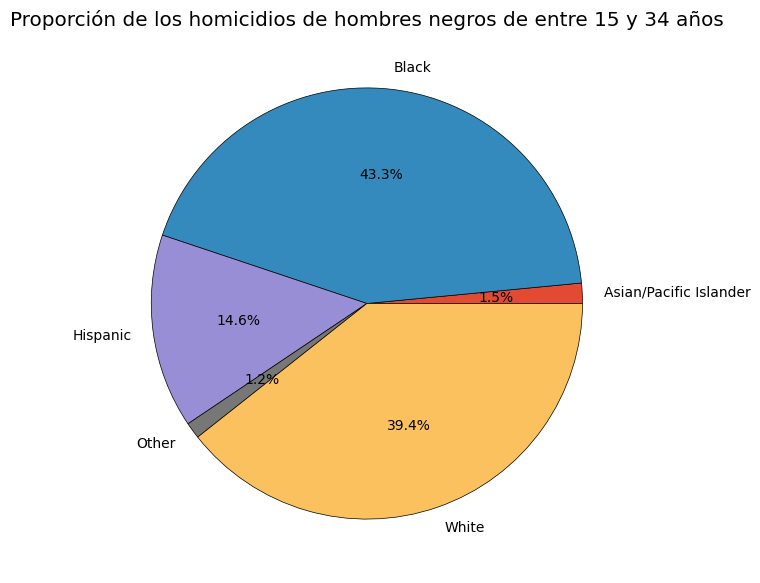

In [243]:
intent_percent4 = df_blackmen_15_34.groupby(['Race'])['Deaths'].sum()/df_blackmen_15_34['Deaths'].sum()*100

plt.figure(figsize=(7,7))
plt.pie(
    intent_percent4.values, 
    labels=intent_percent4.index, 
    autopct='%1.1f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)
plt.title('Proporción de los homicidios de hombres negros de entre 15 y 34 años')
plt.show()

In [239]:
#4. Promedio anual de muertes (2012–2014):

#“En promedio, alrededor de 33,000 personas murieron por arma de fuego cada año entre 2012 y 2014.”
df['Deaths'].sum()/3


np.float64(179193.33333333334)

# Conclusion

Veamos las afirmaciones

1. Distribución por tipo de muerte:

> “Los suicidios representan aproximadamente el 62.7\% (\~21,000), los homicidios el 34.9\% (\~11,500), y solo el 1.6\% (\~500) de las muertes por arma de fuego fueron accidentes.”  

De forma porcentual pudimos comprobar que dichas afirmaciones eran acertadas, puesto el porcentaje que obtuvimos es muy identico al propuesto en el articulo, no obstante en cuanto a la cantidad obtuvimos unas discrepancias, ya que no eran los expuestos por el articulo, al parecer estan multiplicados x10 quisa se duplicaron los datos, o hay algo que no se esta conciderando.

2. Distribución por género:

> “Más del 85\% de las muertes por suicidio corresponden a hombres. Las mujeres representan aproximadamente el 13\% de las muertes por accidentes y el 15 % de los homicidios.”

Esta afirmacion tambien es correcta aproximadamente el 85\% de los suicidios corresponden a hombres y las mujeres representan el 13\% de las muertes accidentes y el 15 % de los homicidios.

3. Edad, raza y homicidio:

> “Cerca de dos tercios de las víctimas de homicidio que son hombres entre 15 y 34 años de edad son personas negras.”

Esta afirmacion es incorrecta realmente los homicidios de hombres negros no representan dos tercios en ese rango de edad, la realidad es que ese grupo de personas solo representa un aproximado de 3/7 partes del total.

4. Promedio anual de muertes (2012–2014):

> “En promedio, alrededor de 33,000 personas murieron por arma de fuego cada año entre 2012 y 2014.”

Esta afirmacion tampoco se cumple, no obstante no se puede decir que es un error, quiza los datos esten mal adguntados ya que no se cuenta con informacion de la fecha quiza los datos del archivo `gun_deaths.csv` hayan sido mal agrupados ya que no cuenta con la estructura para identificar um rango de fechas, pensar esto es valido ya que el mismo articulo expone que este estudio se llevo a cabo adjuntando diversas fuentes de informacion.

Todos las afirmaciones las hice con grafica de pastel ya que son practicas y es facil de representar porcentajes en estas graficas, a diferencia de la 1 las demas son identicas esto lo hice para mantener esa simplicidad, a veces menos es más, esa primer grafica de pastel la hoce diferente por que las etiquetas se encimaban.

Me parecio una practica dificil al inicio pero despues de la segunda afirmacion se me hizo facil entender como hacer esas afirmaciones, con algo mas de tiempo creo que puedo entregar algo mejor pero estoy sadisfecho con los resultados.


# Referencias

FiveThirtyEight. (n.d.). Gun Deaths in America. FiveThirtyEight. https://fivethirtyeight.com/features/gun-deaths/

Seaborn Developers. (n.d.). Seaborn: Statistical Data Visualization. Seaborn. https://seaborn.pydata.org/

Pandas Development Team. (n.d.). Pandas. Pandas: Python Data Analysis Library. https://pandas.pydata.org/